Bir görüntünün parlaklığını ayarlamak için doğrusal olmayan işlem. Piksel değerlerine güç yasası dönüşümünü uygulayarak daha koyu veya daha parlak bölgelerdeki ayrıntıları geliştirir

In [1]:
from ultralytics import YOLO

model = YOLO("runs/detect/train4/weights/best.pt")

In [16]:
import numpy as np

def gamma_correction(img, r):
    img = img / 255
    c= 1
    gamma_image = c * np.power(img, r)
    gamma_image = np.uint8(gamma_image * 255)
    return gamma_image

In [7]:
test_images_folder = "Facial-Recognition-5/test/images"

In [5]:
import os

result_folder = "results"
gamma_result_folder = f"{result_folder}/gamma correction results"
os.makedirs(gamma_result_folder, exist_ok=True)

In [9]:
enhanced_bright =  f"{gamma_result_folder}/enhanced bright regions"
os.makedirs(enhanced_bright, exist_ok=True)

In [ ]:
enhanced_dark =  f"{gamma_result_folder}/enhanced dark regions"
os.makedirs(enhanced_dark, exist_ok=True)

In [10]:
import cv2

for idx, image in enumerate(os.listdir(test_images_folder)):
    image_path = os.path.join(test_images_folder, image)
    image = cv2.imread(image_path)

    image = gamma_correction(image, 0.5)

    result = model.predict(image)
    result[0].save(os.path.join(enhanced_bright, f"prediction_{idx + 1}.jpg"))



0: 640x640 1 Lionel-Messi, 512.8ms
Speed: 15.6ms preprocess, 512.8ms inference, 15.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Elon-Musk, 330.3ms
Speed: 18.4ms preprocess, 330.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Amr-Walidi, 203.4ms
Speed: 15.6ms preprocess, 203.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Jackie-Chan, 228.0ms
Speed: 0.0ms preprocess, 228.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Emma-Watson, 237.0ms
Speed: 0.0ms preprocess, 237.0ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Lionel-Messi, 269.0ms
Speed: 10.5ms preprocess, 269.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Dwayne-Johnson, 360.5ms
Speed: 0.0ms preprocess, 360.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Steve-Jobs, 306.3ms
Speed: 15.6ms preprocess, 30

Görüntülere gama dönüşümü uygulanarak daha parlak bölgeler güçlendirildikten sonra, yüz algılama performansı korudu ancak modelin filtre olmadan algılanmayan bazı görüntüleri algılamasına yardımcı oldu

In [ ]:
for idx, image in enumerate(os.listdir(test_images_folder)):
    image_path = os.path.join(test_images_folder, image)
    image = cv2.imread(image_path)

    image = gamma_correction(image, 2.2)

    result = model.predict(image)
    result[0].save(os.path.join(enhanced_dark, f"prediction_{idx + 1}.jpg"))

Daha koyu bölgeler geliştirildiğinde, yüz algılama da performansını korudu ancak dönüşüm olmadan algılanamayan bir görüntü algılandı ve doğru şekilde tahmin edildi

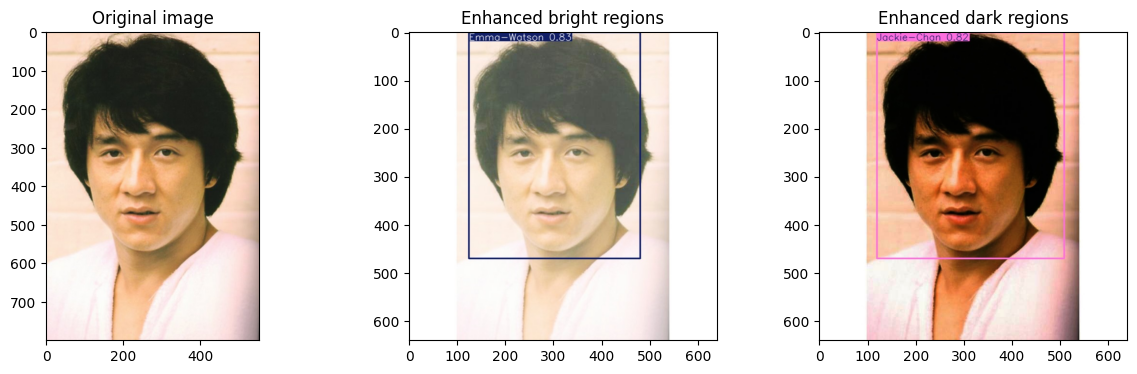

In [48]:
import matplotlib.pyplot as plt

image = cv2.imread("images/jackie-chan/13.jpeg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image_gamma_brightness = cv2.imread(f"{enhanced_bright}/prediction_5.jpg")
image_gamma_brightness = cv2.cvtColor(image_gamma_brightness, cv2.COLOR_BGR2RGB)

image_gamma_darkness = cv2.imread(f"{enhanced_dark}/prediction_5.jpg")
image_gamma_darkness = cv2.cvtColor(image_gamma_darkness, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.title("Original image")
plt.imshow(image)
plt.subplot(1,3,2)
plt.title("Enhanced bright regions")
plt.imshow(image_gamma_brightness)
plt.subplot(1,3,3)
plt.title("Enhanced dark regions")
plt.imshow(image_gamma_darkness)
plt.show()

In [17]:
cap = cv2.VideoCapture(0)

while cap.isOpened():

    ret, frame = cap.read()

    if not ret:
        break

    frame = gamma_correction(frame, 2.2)
    result = model.predict(frame)
    cv2.imshow("histogram equalization", result[0].plot())

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


0: 480x640 1 Amr-Walidi, 222.7ms
Speed: 0.0ms preprocess, 222.7ms inference, 8.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Amr-Walidi, 313.9ms
Speed: 10.2ms preprocess, 313.9ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Amr-Walidi, 253.1ms
Speed: 20.2ms preprocess, 253.1ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 264.8ms
Speed: 2.0ms preprocess, 264.8ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Amr-Walidi, 183.2ms
Speed: 0.0ms preprocess, 183.2ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 181.8ms
Speed: 0.0ms preprocess, 181.8ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Amr-Walidi, 163.0ms
Speed: 2.1ms preprocess, 163.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 134.0ms
Speed: 8.1ms preprocess, 134.0m